# IMDB Movie Review Analyzing System - Machine Learning

**Using this System, End User can get a conclusion about the movie whether the movie is worth to watch or not**

# 01.Training the Model Using Machine Learning Techniques

**1.1 Importing the Dataset**

In [1]:
import pandas as pd

Ds = pd.read_csv(r"IMDB Dataset.csv")
pd.set_option('display.max_colwidth',5000)
Ds.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

**1.2 Data PreProcessing**

In [2]:
import re
import string

def Data_Clean(review):
    review = review.lower() #converts in to lower case
    review= re.sub('\[.*?\]', '', review) #removes characters inside []form each reviews
    review = re.sub("\\W"," ",review) #removes /,\ slashes 
    review = re.sub('https?://\S+|www\.\S+', '', review) #remove the links and macthes the white spaces
    review = re.sub('<.*?>+', '', review) #removes <br> tags specially <>
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) #remove punctuations from the review
    review= re.sub('\n', '', review) #matches the white spaces and reformat the text
    review = re.sub('\w*\d\w*', '', review) #remove numbers and digits from the reviews   
    return review

In [3]:
Ds["review"] = Ds["review"].apply(Data_Clean)
pd.set_option('display.max_colwidth',5000)
Ds.head()

,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side,positive
1,a wonderful little production br br the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love br br this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman br br this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his parents are fighting all the time br br this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie br br ok first of all when you re going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing arguing like

**1.3 Getting Numerical values for Reviews**

**If the Review is Postive, the Value will be 1. If it's Negative, Value will be 0**

In [4]:
Ds['Value'] = Ds['sentiment'].apply(lambda x: 1 if x =='positive' else 0)
Ds.head()

,review,sentiment,Value
0,one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare forget pretty pictures painted for mainstream audiences forget charm forget romance oz doesn t mess around the first episode i ever saw struck me as so nasty it was surreal i couldn t say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards who ll be sold out for a nickel inmates who ll kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side,positive,1
1,a wonderful little production br br the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done,positive,1
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a light hearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to love br br this was the most i d laughed at one of woody s comedies in years dare i say a decade while i ve never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young woman br br this may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends,positive,1
3,basically there s a family where a little boy jake thinks there s a zombie in his closet his parents are fighting all the time br br this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie br br ok first of all when you re going to make a film you must decide if its a thriller or a drama as a drama the movie is watchable parents are divorcing 

**1.4 Splitting the Dataset in to Testing and Training Data**

In [5]:
from sklearn.model_selection import train_test_split

x=Ds["review"]
y=Ds["Value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [6]:
train_len=len(x_train)
test_len=len(x_test)

print("Training Data Length:"+str(train_len))
print("Testing Data Length:"+str(test_len))

Training Data Length:35000
Testing Data Length:15000


**1.5 Converting text reviews into Nuemrical Values**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
xv_train=tfidf.fit_transform(x_train)#Learn vocabulary and idf, return document-term matrix.
xv_test=tfidf.transform(x_test) #Learn vocabulary and idf from training set.

In [8]:
features=len(tfidf.get_feature_names())
print("Length of Features:"+str(features))

Length of Features:86054


In [9]:
tfidf.get_feature_names()

['aa',
 'aaa',
 'aaaaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaargh',
 'aaaaaaah',
 'aaaaaaahhhhhhggg',
 'aaaaagh',
 'aaaaah',
 'aaaaahhhh',
 'aaaaargh',
 'aaaaatch',
 'aaaaaw',
 'aaaahhhhhh',
 'aaaahhhhhhh',
 'aaaarrgh',
 'aaagh',
 'aaah',
 'aaahhhhhhh',
 'aaam',
 'aaargh',
 'aaarrrgh',
 'aaawwwwnnn',
 'aachen',
 'aadha',
 'aag',
 'aage',
 'aaghh',
 'aahed',
 'aahhh',
 'aahing',
 'aaila',
 'aailiyah',
 'aaja',
 'aajala',
 'aak',
 'aakash',
 'aaker',
 'aakrosh',
 'aalcc',
 'aaliyah',
 'aames',
 'aamir',
 'aamr',
 'aamto',
 'aan',
 'aankhen',
 'aaoon',
 'aap',
 'aapke',
 'aardman',
 'aardvark',
 'aardvarks',
 'aargh',
 'aarika',
 'aaron',
 'aarp',
 'aarrrgh',
 'aashok',
 'aasman',
 'aatish',
 'aaton',
 'aau',
 'aavjo',
 'aawip',
 'aaww',
 'ab',
 'aback',
 'abagail',
 'abanazer',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abas',
 'abashed',
 'abashidze',
 'abasing',
 'abating',
 'abattoirs',
 'abba',
 'abbad',
 'abbas',
 'abbasi',
 'abbey',
 'abbie',
 'abbot',
 'abbo

**1.6 Machine Learning Classifier**

In [10]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

classifier=LinearSVC()
NB_classifier=MultinomialNB()

In [11]:
SVC_Classifier=classifier.fit(xv_train,y_train)
NB_classifier.fit(xv_train,y_train)

MultinomialNB()

**1.7 Accuracy Value   on 15000 reviews(Testing Data)**

In [12]:
SVC_Score=classifier.score(xv_test,y_test)
NB_Score=NB_classifier.score(xv_test,y_test)

print("Linear SVC Accuracy:"+str(SVC_Score))
print("Naive Bayes Accuracy:"+str(NB_Score))

Linear SVC Accuracy:0.8967333333333334
Naive Bayes Accuracy:0.8648


**1.8 Predicting Reviews from Trained model**

In [13]:
pred=classifier.predict(xv_test)
NB_classifier_pred=NB_classifier.predict(xv_test)

**1.9 Classification Report**

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7540
           1       0.89      0.91      0.90      7460

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



In [15]:
print(classification_report(y_test,NB_classifier_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7540
           1       0.88      0.84      0.86      7460

    accuracy                           0.86     15000
   macro avg       0.87      0.86      0.86     15000
weighted avg       0.87      0.86      0.86     15000



**Saving the Model using pickle**

In [15]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(SVC_Classifier,f)

**Saving Vectorizer using Pickle**

In [16]:
with open('tfidf_vectorizer','wb') as a:
    pickle.dump(tfidf,a)

# 02.Movie Review URL Analyzer

**2.1 Movie Review URL Input**

In [1]:
import pickle

with open('model_pickle','rb') as f:
    mod=pickle.load(f)
    
with open('tfidf_vectorizer','rb') as f:
    mod_vec=pickle.load(f)

In [12]:
movie_review_url = str(input())
len(movie_review_url)

https://www.imdb.com/title/tt0111161/reviews?spoiler=hide&sort=submissionDate&dir=desc&ratingFilter=0


101

**2.2 Scraping the Reviews of Selected Movie**

In [13]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

if (len(movie_review_url) == 102) or (len(movie_review_url) == 101) and movie_review_url.startswith('https://www.imdb.com/title/'):
    page = urlopen(movie_review_url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, "html.parser")
    
    moviereviews = soup.find_all("div", class_="text show-more__control")
    
    reviews = []
    for mreviews in moviereviews:
        reviews.append(mreviews.text)
    
else:
    print("Inavlid URL")

**2.3 Creating a CSV File with the Scraped Movie Reviews**

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

df = pd.DataFrame()
df['Review'] = reviews

**2.4 Applying the Trained Model to the Movie Reviews**

In [15]:
import re
import string

def Data_Clean(review):
    review = review.lower() #converts in to lower case
    review= re.sub('\[.*?\]', '', review) #removes characters inside []form each reviews
    review = re.sub("\\W"," ",review) #removes /,\ slashes 
    review = re.sub('https?://\S+|www\.\S+', '', review) #remove the links and macthes the white spaces
    review = re.sub('<.*?>+', '', review) #removes <br> tags specially <>
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) #remove punctuations from the review
    review= re.sub('\n', '', review) #matches the white spaces and reformat the text
    review = re.sub('\w*\d\w*', '', review) #remove numbers and digits from the reviews   
    return review

In [16]:
df["Review"]=df["Review"].apply(Data_Clean)
cleaned=df["Review"]
vec=mod_vec.transform(cleaned)
df["Sentiment Type"]=mod.predict(vec)
df["Sentiment"] = df["Sentiment Type"].apply(lambda x: "Positive" if x == 1 else "Negative")

# 03.Result Page

**3.1 Movie Reviews with the Sentiment Type**

In [17]:
pd.set_option('display.max_colwidth',5000)
df.head(25)

,Review,Sentiment Type,Sentiment
0,i am really glad that stupid people didnt ruined this movies score the shawshank redemption have a great story and huge actors that made their roles flawlessly the story made everything in this movie everything if you didnt watched until now what are you waiting for,1,Positive
1,this movie is best i watched it many times and really love it thanks,1,Positive
2,simply one of the most intelligent and most enjoyable films ever made genius frank darabont utilises stephen king s masterwork perfectly couldn t be praised any more really all is great from emotional performances by robbins and freeman to storytelling qualities and the ability to retain fans interest must watch experience,1,Positive
3,oh my it s fantastic film greatest film for all time,1,Positive
4,everything in this movie is well constructed especially the last minutes of its are so satisfying,1,Positive
5,best movie ever must watch slow in the starting but it changes all,1,Positive
6,this movie started slow but then little twist change all must watch movie,0,Negative
7,i m quite ashamed to say that as a self confessed cinephile at the age of i had never watched the shawshank redemption until today of course i was aware of it and how highly regarded it is but i had just never got around to watching it until today and man was i glad i did i regard the shawshank redemption more as a work of art beautifully put together and very simplistic in nature at its essence this is a movie about people about hope about friendship i thought tim robins and morgan freeman simply stole the show and showcased just what brilliant actors they are my personal favourite movie of all time is christoper nolan s the dark knight but it is very hard for me to imagine another movie replacing the shawshank redemption as the greatest movie ever made due to just how perfectly executed it was and how emotionally invoking it is as a viewer watching the story unfold an absolutely brilliant movie one that must be seen by any film lover and one that is well deserving of its place at the summit of the imdb greatest ever movies chart,1,Positive
8,when i saw the film for the first time i knew from the beginning that in order to better understand it i had to watch it for the second time a combination of courage hard work freedom and humanity,1,Positive
9,really this is one of those movies that can make me cry be touched believe in something believe in human s ability to live human s desire to live the movie is truly a masterpiece and it is impossible to remake the second one,1,Positive


**3.2 Bar Chart of Review Sentiments**

<AxesSubplot:>

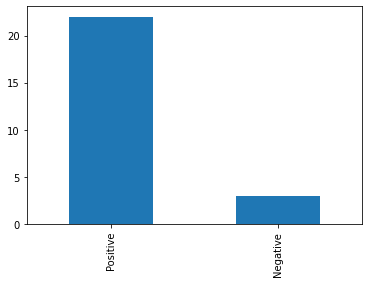

In [18]:
df['Sentiment'].value_counts().plot(kind='bar')

**3.3 Pie Chart of Review Sentiments**

<AxesSubplot:ylabel='Sentiment'>

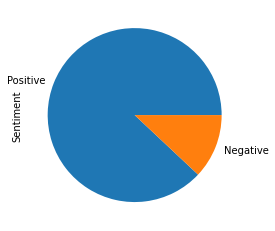

In [19]:
df['Sentiment'].value_counts().plot(kind='pie')

**3.4 Percentage Rate of Sentiments**

In [20]:
p=df['Sentiment'].value_counts(' ')*100
print(p.to_string())

Positive    88.0
Negative    12.0


**3.5 Movie Recommendation Status**

In [21]:
positive_reviews=len(df[df['Sentiment'] == 'Positive'])
Negative_reviews=len(df[df['Sentiment'] == 'Negative'])

if positive_reviews>Negative_reviews:
    print("People are Impressed With this Movie/Tv Show. Recommended to Watch")
else:
    print("People are Not Impressed with this Movie/Tv Show")

People are Impressed With this Movie/Tv Show. Recommended to Watch
